#Libraries Import

In [22]:
import keras
import tensorflow.keras as tk
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

Accept dataset in tuple form, first index is np arrays (images) and second is labels and display n random images with labels from it
Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        
Output:
            None

##Print Function

In [23]:
def display_random_images_with_labels(d, n=10):
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

##Description of dataset
mnint is handwritten digits (0 to 9) images dataset keras.datasets.mnist.load_data() loads those images in gray scale as cv2 images / np arrays with those labels dataset is in tuple form, its first index dataset[0] represents training dataset its second index dataset[1] represents testing dataset. Both training (dataset[0]) and testing (dataset[1]) datasets are further tuples and have two elements, first element of both training and testing (dataset[0][0] and dataset[0][0]) represnts images in numpy arrays.

There are 60000 images in training dataset
There are 10000 images in testing dataset
___________________
(28, 28)
___________________
Randomly printing 10 images with labels from training dataset
index: 50787
Lable: 9


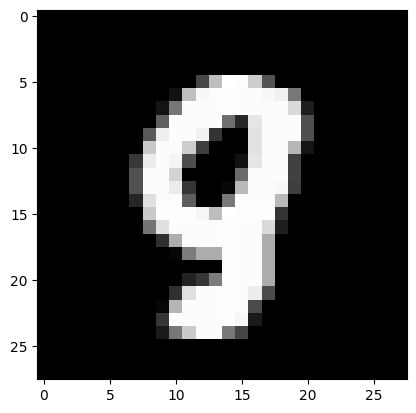

index: 57247
Lable: 3


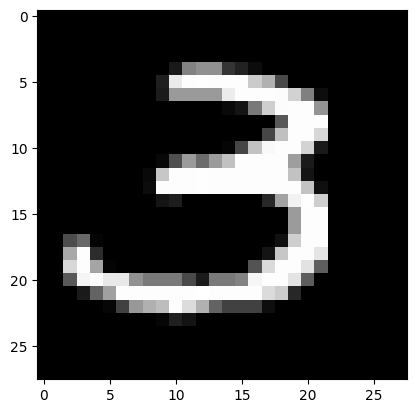

index: 25456
Lable: 0


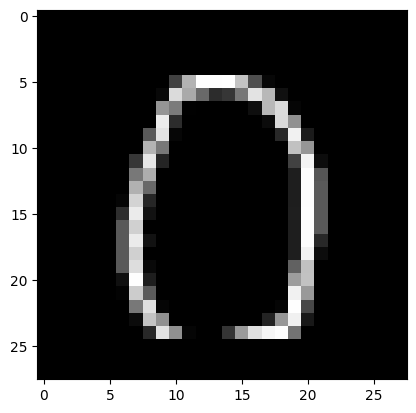

index: 55653
Lable: 2


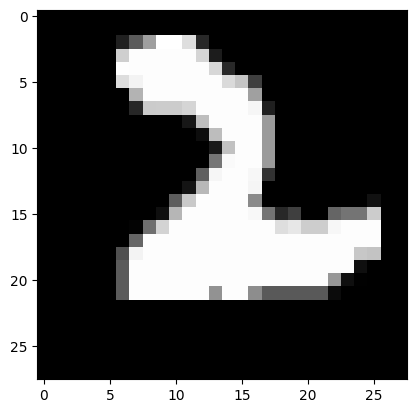

index: 24200
Lable: 7


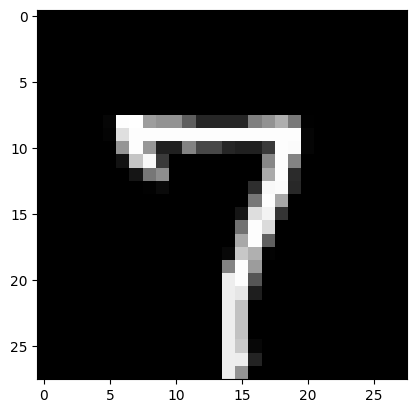

index: 59793
Lable: 8


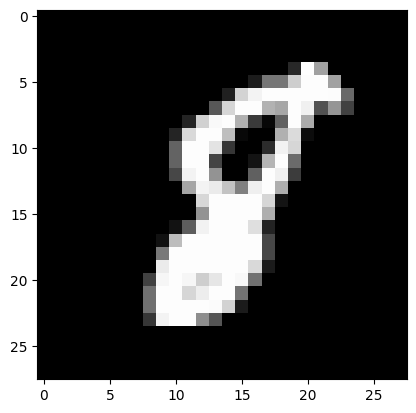

index: 11926
Lable: 9


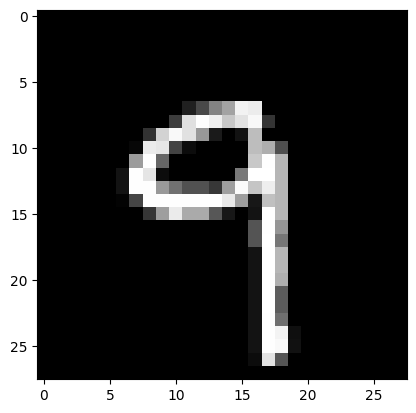

index: 5474
Lable: 8


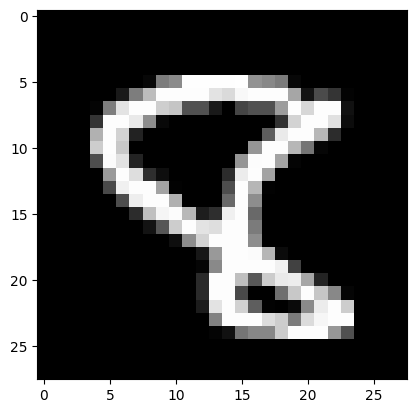

index: 928
Lable: 7


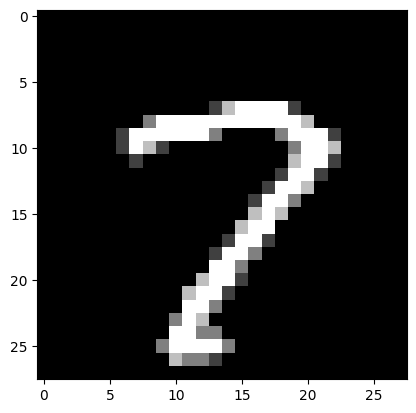

index: 17066
Lable: 6


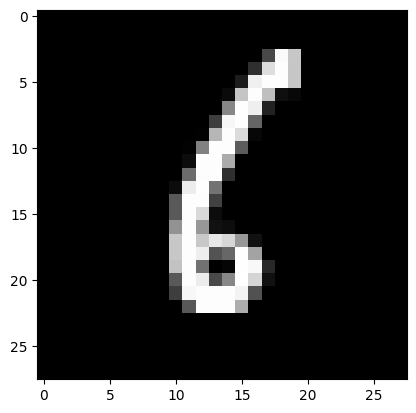

___________________
Randomly printing 10 images with labels from testing dataset
index: 13469
Lable: 7


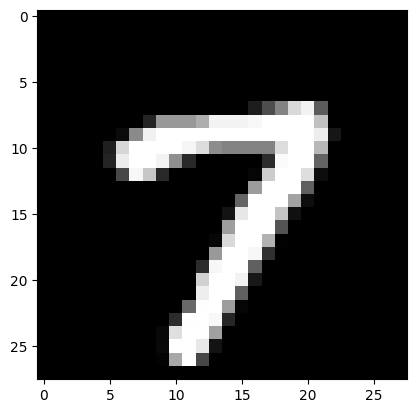

index: 12922
Lable: 4


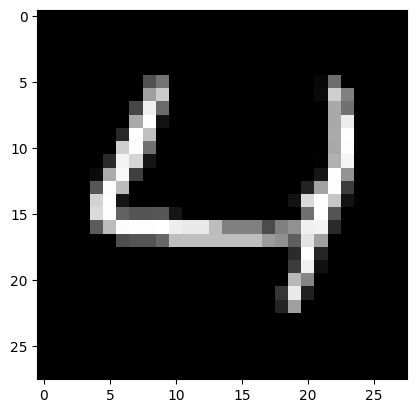

index: 23075
Lable: 6


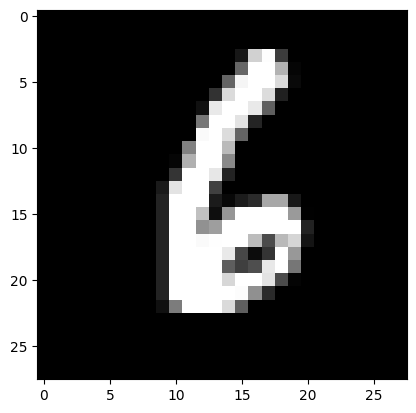

index: 49153
Lable: 6


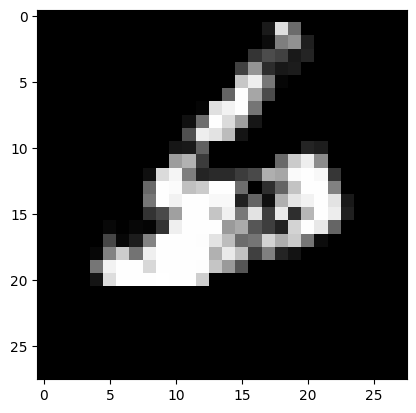

index: 20471
Lable: 0


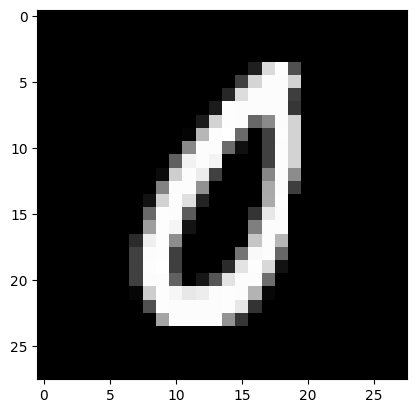

index: 45038
Lable: 4


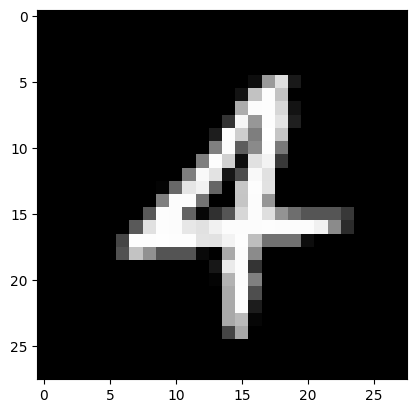

index: 22842
Lable: 9


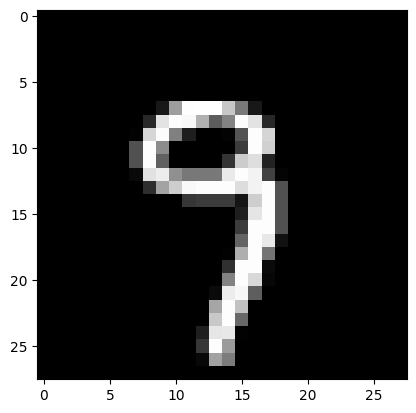

index: 31045
Lable: 1


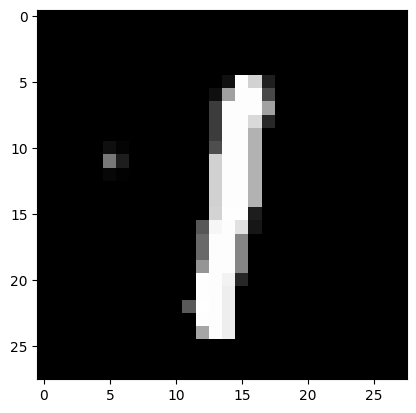

index: 733
Lable: 0


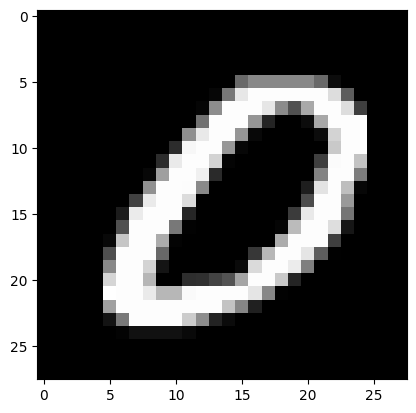

index: 39700
Lable: 5


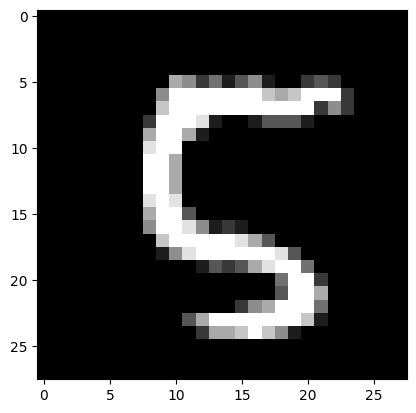

___________________
There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in testing dataset for 10000 images in testing dataset
___________________
There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

__________


In [24]:
# Dataset
# Loading dataset
dataset = tk.datasets.mnist.load_data()

print("There are",len(dataset[0][0]),"images in training dataset")

print("There are",len(dataset[1][0]),"images in testing dataset")

print("___________________")

#Each image is of shape 28x28
print(dataset[0][0][0].shape)

print("___________________")

'''
second element of both training and testing (dataset[0][1] and dataset[0][1])
represnts labels of the images, presents on the same index in images
For example dataset[0][0][0] is an image in training dataset
and dataset[0][1][0] is the label of same image is training dataset
'''

print("Randomly printing 10 images with labels from training dataset")

display_random_images_with_labels(dataset[0])

print("___________________")

print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(dataset[0])

print("___________________")
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")

print("There are",len(dataset[1][1]),"labels in testing dataset for",len(dataset[1][0]),"images in testing dataset")

print("___________________")
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(dataset[0][1]))

print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(dataset[1][1]))

print("__________")

# Task

You have to reduce the size of this dataset by 10 times.
There are currently almost 5000 to 6000 thousand images (total: 60000) for each label in training and almost 1000 images (total: 10000) for each label in testing dataset.
You are required to reduce this training dataset so that it will have exactly 600 images for each label (total: 6000) in training dataset and exactly 100 images for each label in testing dataset (total: 1000)
new dataset should be stored into new_dataset variable name and should have exactly same format as the original dataset.
Your code here

In [30]:
#Reduce function goes here
def reduce_dataset_size(images, labels, new_size):
    label_counter = collections.Counter(labels)
    new_images = []
    new_labels = []

    for label in range(10):
        label_indices = [i for i in range(len(images)) if labels[i] == label]
        label_indices = label_indices[:new_size]
        new_images.extend(images[i] for i in label_indices)
        new_labels.extend(labels[i] for i in label_indices)

    new_images = np.array(new_images)
    new_labels = np.array(new_labels)
    return new_images, new_labels

In [31]:
#Creating new dataset
(train_images, train_labels) , (test_images, test_labels) = tk.datasets.mnist.load_data()

new_train_images, new_train_labels = reduce_dataset_size(train_images, train_labels, new_size=600)
new_train_dataset = (new_train_images, new_train_labels)

new_test_images, new_test_labels = reduce_dataset_size(test_images, test_labels, new_size=100)
new_test_dataset = (new_test_images, new_test_labels)

new_dataset = (new_train_dataset, new_test_dataset)

## Validation of Task

In [32]:
# Checking the shape of first image in new training dataset

print(new_dataset[0][0][0].shape)

print("___________________")

#Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")

print("There are",len(new_dataset[1][1]),"labels in testing dataset for",len(new_dataset[1][0]),"images in testing dataset")

print("___________________")

(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in testing dataset for 1000 images in testing dataset
___________________


###Excepted output
There are 6000 labels in training dataset for 6000 images in training dataset.
There are 1000 labels in testing dataset for 1000 images in testing dataset.
Checking the number of images per class

In [33]:
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(new_dataset[0][1]))

print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(new_dataset[1][1]))

print("___________________")

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

___________________


###Expected output
There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Randomly printing 10 images with labels from training dataset
index: 3191
Lable: 5


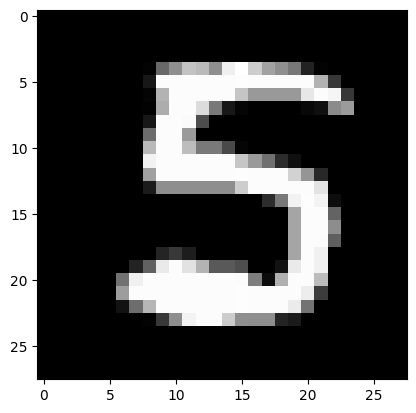

index: 456
Lable: 0


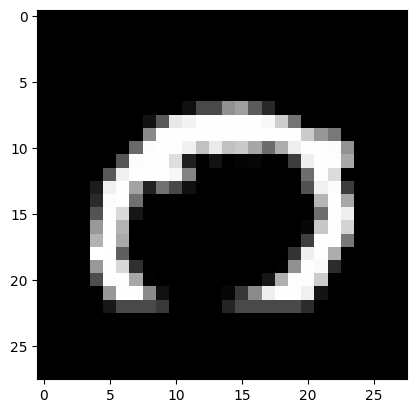

index: 5255
Lable: 8


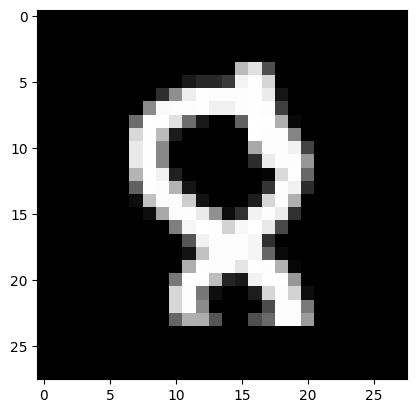

index: 5789
Lable: 9


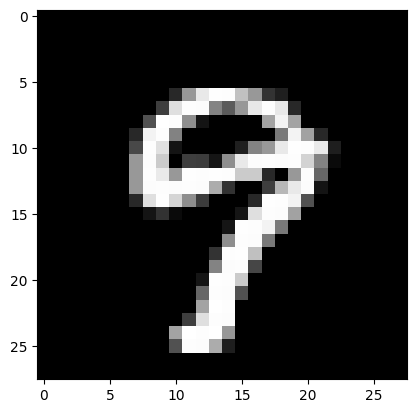

index: 1109
Lable: 1


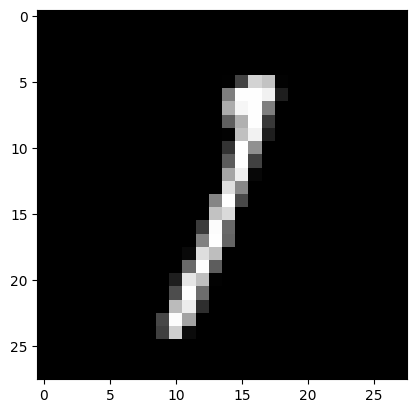

index: 5575
Lable: 9


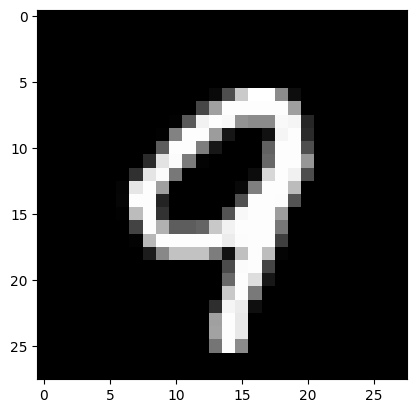

index: 4326
Lable: 7


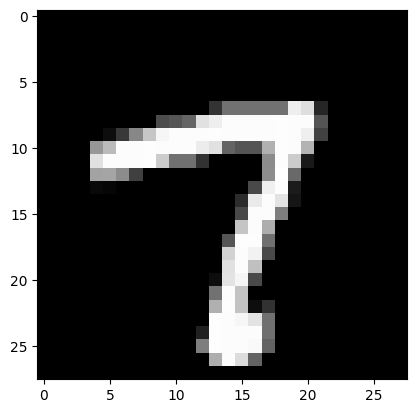

index: 436
Lable: 0


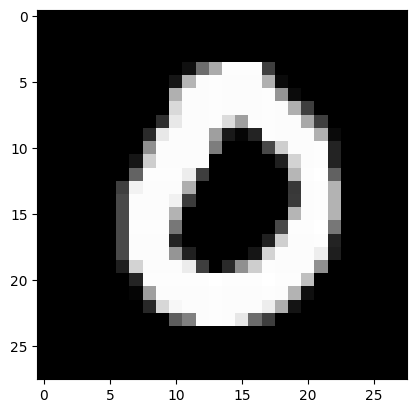

index: 3633
Lable: 6


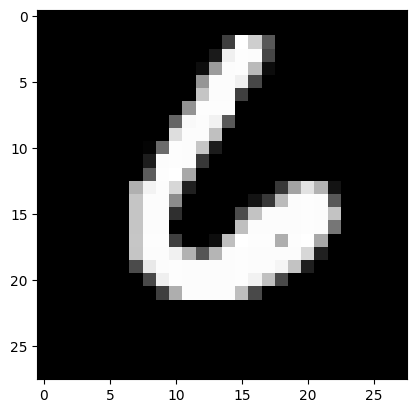

index: 411
Lable: 0


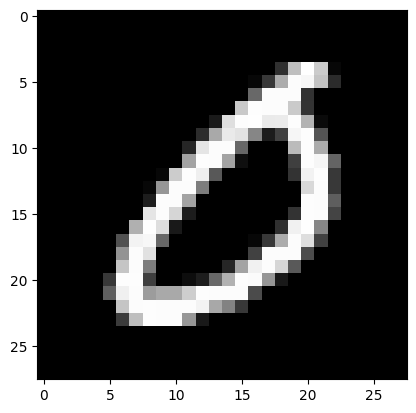

___________________
Randomly printing 10 images with labels from testing dataset
index: 3762
Lable: 6


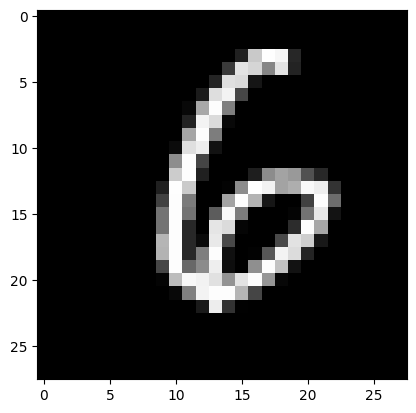

index: 5033
Lable: 8


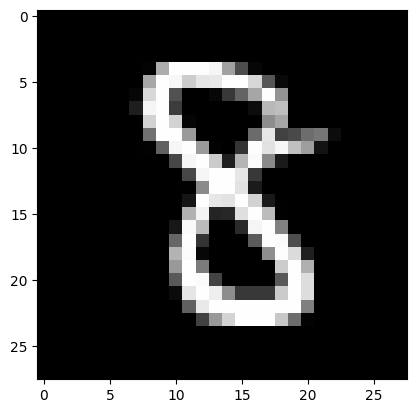

index: 1788
Lable: 2


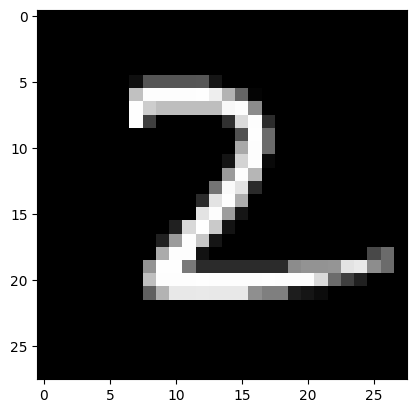

index: 452
Lable: 0


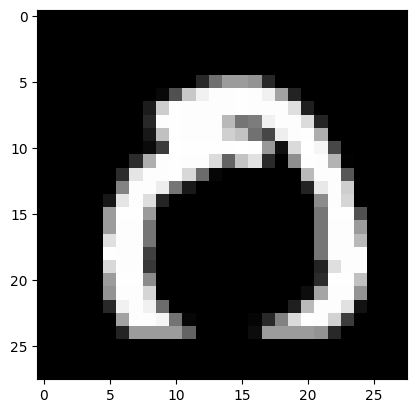

index: 3689
Lable: 6


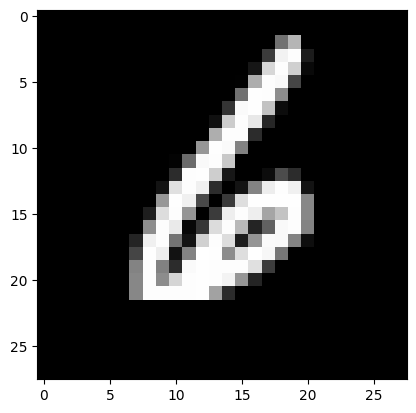

index: 4814
Lable: 8


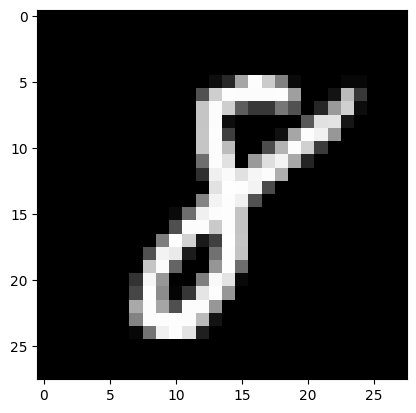

index: 4983
Lable: 8


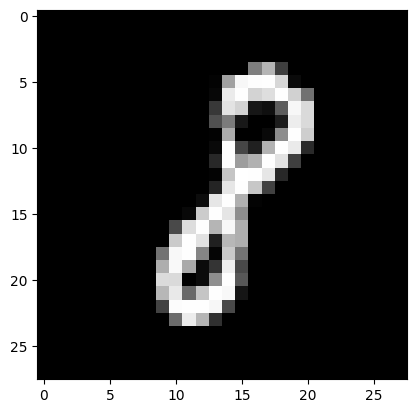

index: 5535
Lable: 9


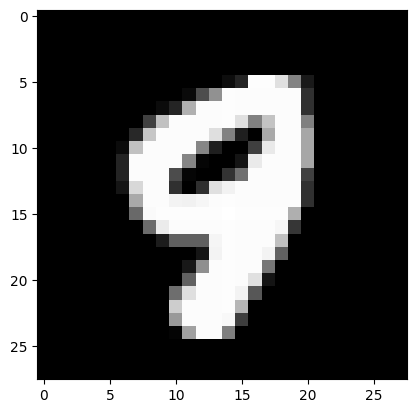

index: 4245
Lable: 7


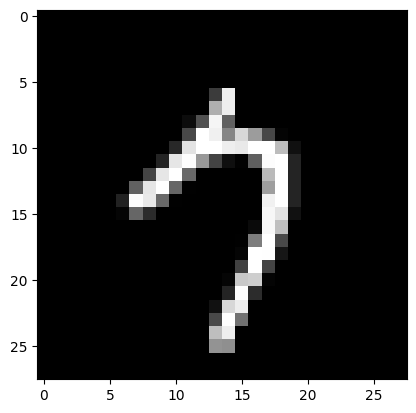

index: 5908
Lable: 9


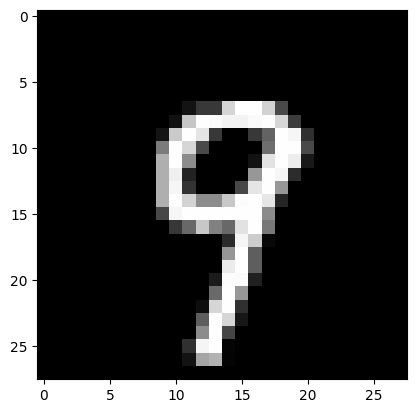

_____________


In [34]:
Counter({0: 600,
1: 600,
2: 600,
3: 600,
4: 600,
5: 600,
6: 600,
7: 600,
8: 600,
9: 600})

'''
There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
'''

Counter({0: 100,
1: 100,
2: 100,
3: 100,
4: 100,
5: 100,
6: 100,
7: 100,
8: 100,
9: 100})

#Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")

display_random_images_with_labels(new_dataset[0])

print("___________________")

print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(new_dataset[0])

print("_____________")